## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 잠재 요인 </span>
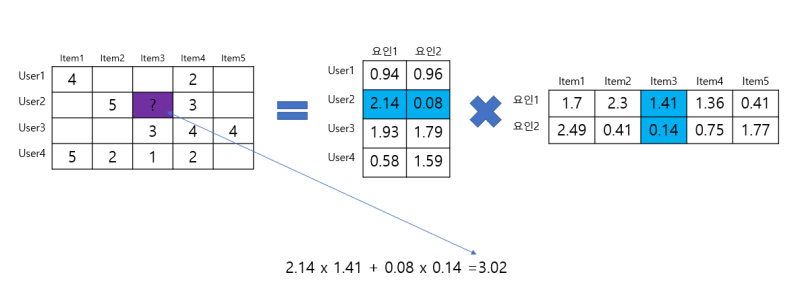
> 사용자-아이템 상호작용 행렬에서 사용자의 취향이나 아이템의 특성을 설명하는 **숨겨진 차원**

1. 평점 행렬 $R$을 유저 잠재 요인 행렬 $P$와 아이템 잠재 요인 행렬 $Q^T$로 분해
2. 모델 학습
3. 두 잠재 요인 벡터의 내적(유사도)로 평점 예측 가능

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 행렬 분해(MF) </span>
> 앞서 보았듯 $R$이 $P$와 $Q$의 내적으로 설명될 수 있다는 가설에서 출발!

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 목표 </span>
1. `관측된 평점을 가장 잘 재현하는 적절한 잠재 요인의 개수 k 찾기` <br>
2. $R \approx P \times Q^T$`이 되도록 $Q$와 $P$를 학습`

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 예측 </span>
$\\ \hat{r}*{u, i} = p\_u \cdot q\_i = \sum*{f=1}^{k} p\_{u, f} \cdot q\_{i, f}$

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> 수행 방식</span>
##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> SVC: 특이값 분해 </span>
> 어떤 직사각형 행렬이든 다음의 세 행렬로 분해할 수 있는 방법

$A=UΣV^T$

- $A$ : 원래의 $m×n$ 행렬 (사용자-아이템 평점 행렬)
- $U$ :  $m×m$ 직교 행렬 (사용자 관련 정보)
- $Σ$ : $m×n$ 대각 행렬 (가장 중요한 정보: **특이값**)
- $V^T$ : $n×n$ 직교 행렬 (아이템 관련 정보)

| 구분 | Full SVD (완전 특이값 분해) | Truncated SVD (절단 특이값 분해) |
| --- | --- | --- |
| **사용** | 모든 특잇값과 벡터 사용 | 상위 $k$개의 큰 특잇값과 해당 벡터만 사용 |
| **적용** | 밀집 행렬(Dense Matrix)에 적합 | **희소 행렬(Sparse Matrix) 압축 및 노이즈 제거** |

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> SGD </span>
> 관측된 평점($r_{u, i}$)과 예측 평점($\hat{r}_{u, i}$) 사이의 오차를 최소화

$\min(P, Q) \sum_{(u, i) \in \mathcal{K}} (r_{u,i} - \hat{r}_{u,i})^2 + \lambda (\sum_u \|p_u\|^2 + \sum_i \|q_i\|^2)$

- $\mathcal{K}$ : 평점이 관측된 $(u, i)$ 쌍의 집합.
- $\lambda$ : 정규화 계수

목적 함수: `오차의 제곱합을 최소화`하고, `과적합을 방지하기 위한 정규화`(Regularization) 항을 추가

-> SVD의 `데이터 희소성 처리 불가`와 `계산 복잡성`이라는 한계를 보완하기 위한 방법

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> NMF </span>
> 분해된 두 개의 행렬 $P$와 $Q^T$의 모든 원소가 0 이상이어야 한다는 제약 조건을 추가한 행렬 분해 기법

`직관적 의미 부여 가능`

잠재 요인 값은 음수가 될 수 x (현실 데이터는 음수가 될 수 없으니...)

-> 각 잠재 요인 값이 유저 선호도나 아이템 특성 강도 나타냄을 직관적으로 해석

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> PMF </span>
> 평점 예측에 확률 분포를 사용하여 불확실성까지 모델링하는 통계적 접근법

`누가 무엇을 좋아할지` 예측하는 데에 목표

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 딥러닝 기반 모델 사용</span>

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> VAE</span>
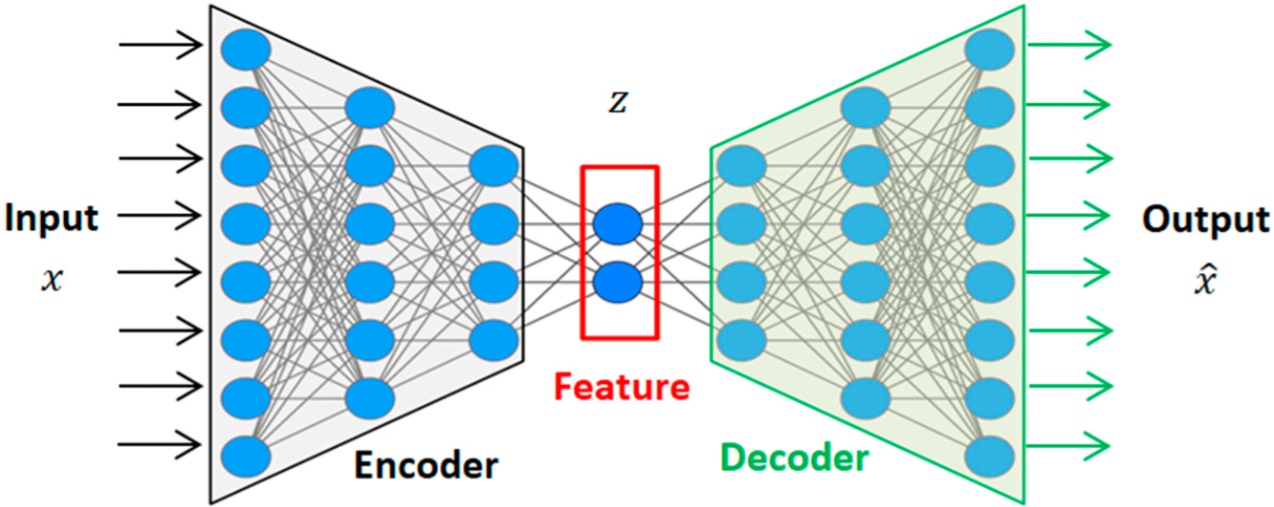
> 사용자의 아이템 상호작용 벡터(예: 구매/시청 이력)를 입력으로 받아, 잠재 공간에서 재구성하도록 VAE를 학습하는 방식

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 장점 </span>
- 확률적 잠재 분포로 사용자 선호를 모델링하여 불확실성 반영
- 희소한 상호 작용 데이터에서도 강건
- 비선형성 학습

ex) Mult-VAE

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> GNN</span>
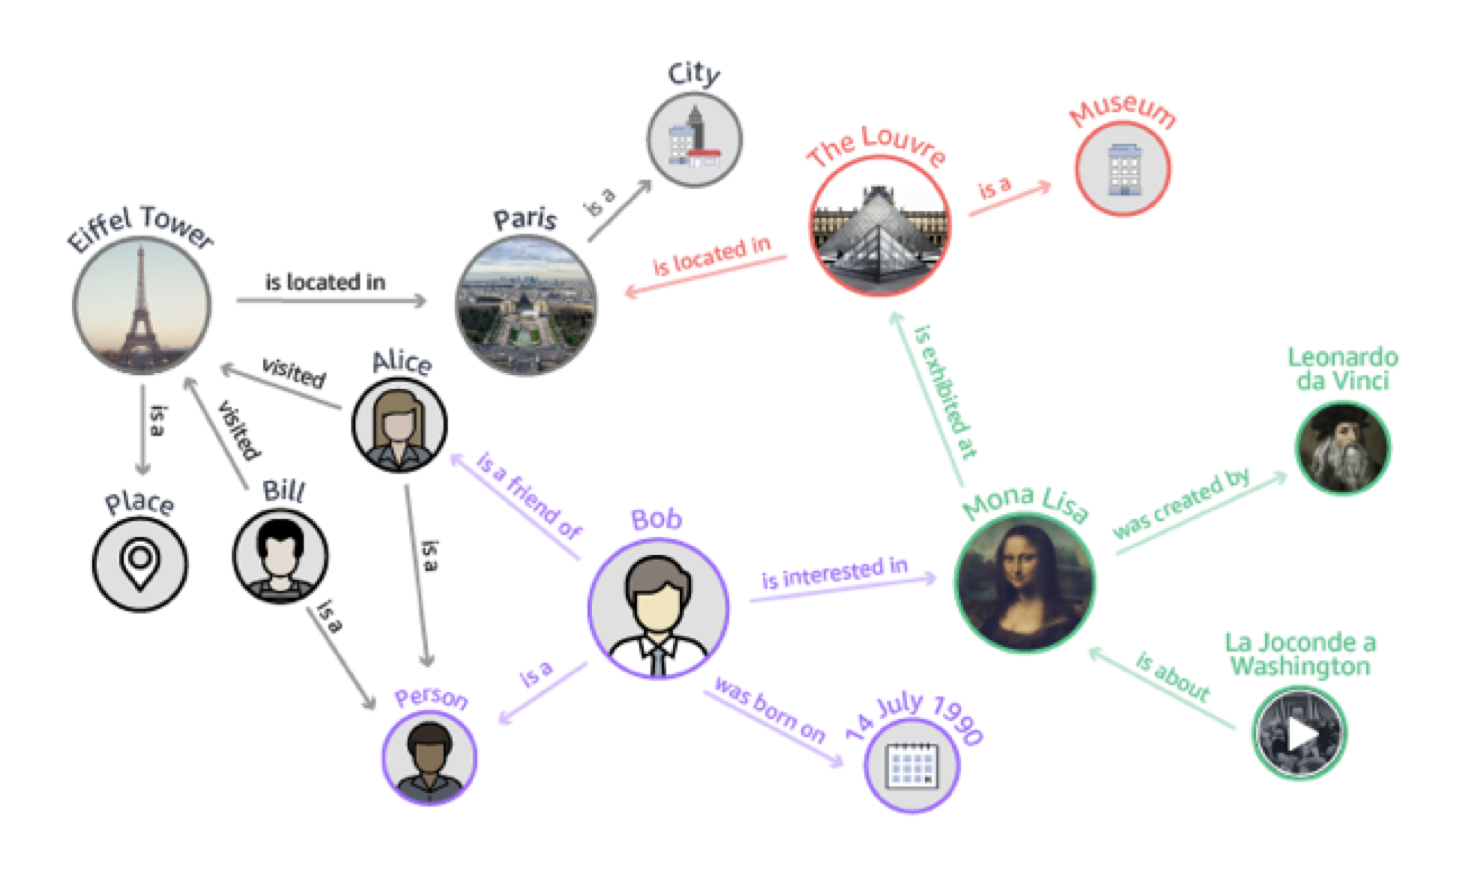
> 그래프를 기반으로 사용자는 자신이 본 아이템과, 아이템은 자신을 본 사용자들과 연결됨

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 작동 프로세스 </span>
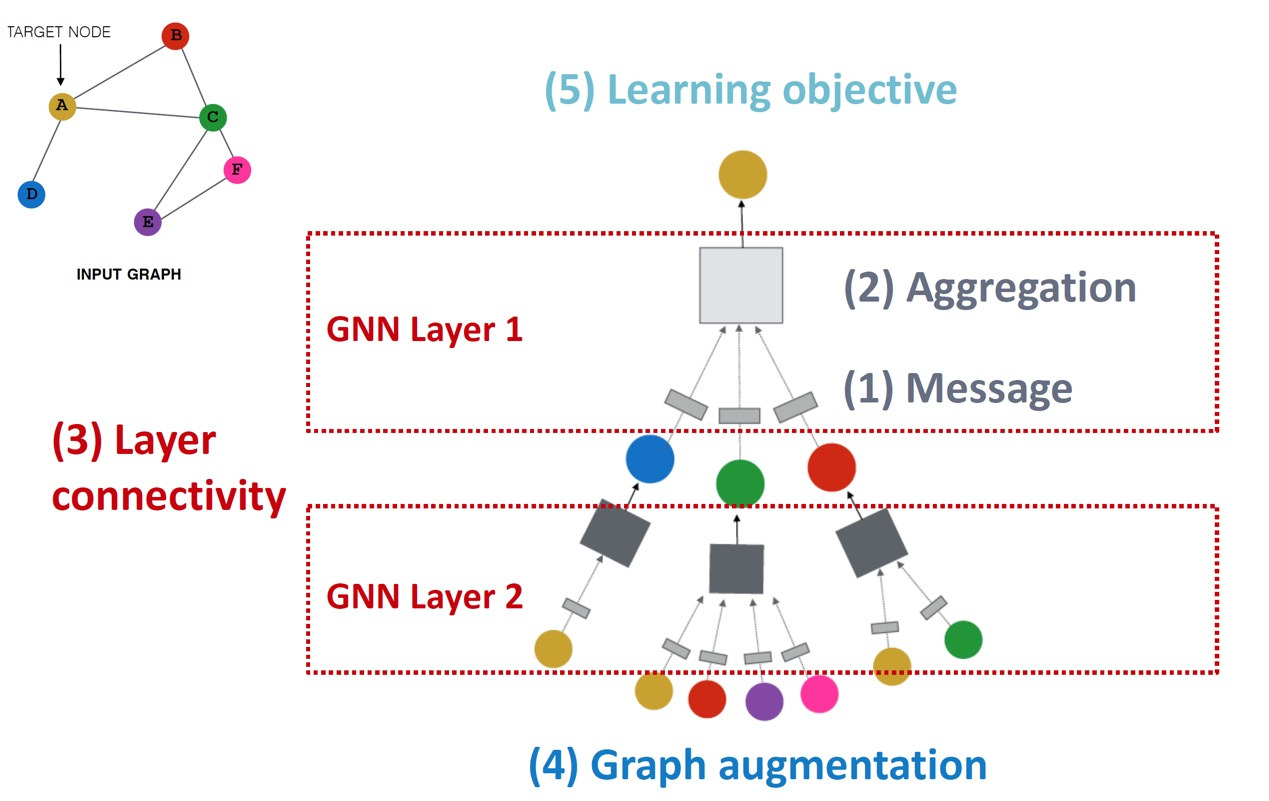
> 내 이웃 노드(나와 비슷한 사용자, 내가 본 아이템)의 정보를 나에게 전달/요약(Message Passing)

1. 그래프 구조 생성
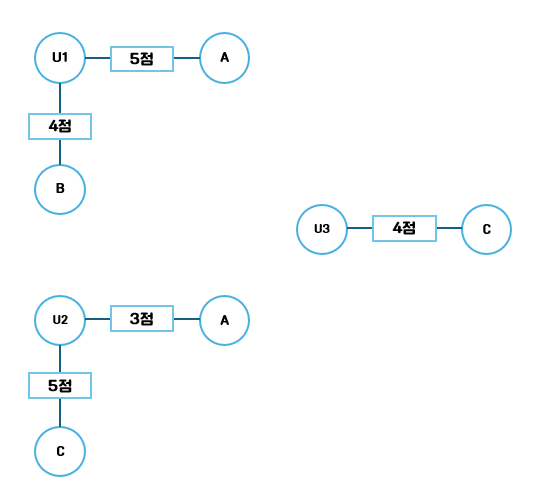
2. 메시지 패싱: ‘메시지 생성 - 집계 - 갱신’
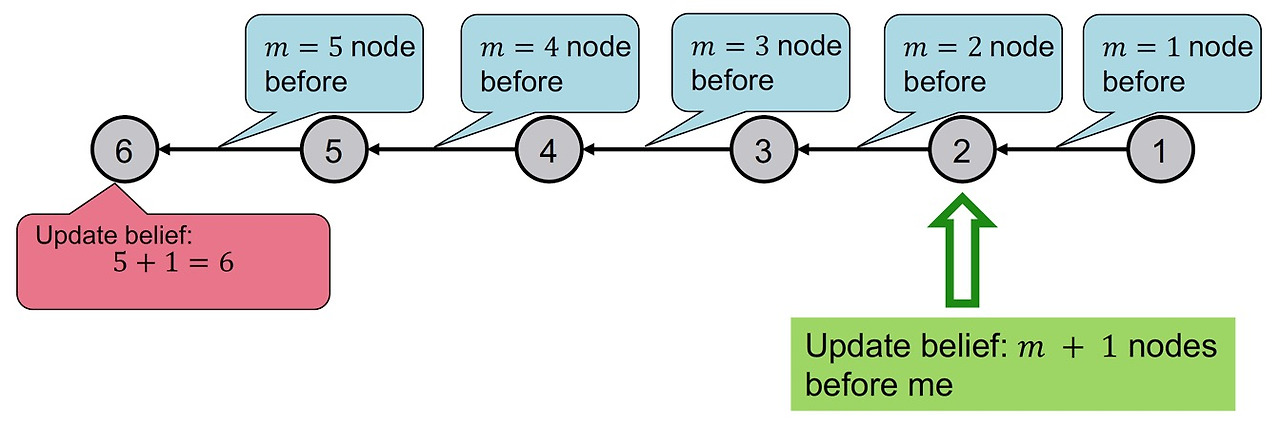

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 장점 </span>
1. 고차원 협업 시그널 포착 가능
2. 정형화되지 않은 데이터 학습 가능
3. Cold Start 문제 완화

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 단점 </span>
1. 과평탄화 문제
2. 과압축 문제
3. 계산 복잡도
4. 해석의 어려움: 순서 반영 x

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> TRANSFORMER</span>
> 행동 순서와 문맥으로 사용자 의도 파악

`Attention`으로 시간 순서나 거리에 얽매이지 않고, 전체 시퀀스 내에서 현재 의도와 가장 관련성이 높은 핵심 문맥을 정확히 '주목'하여 예측

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;">SASRec </span>
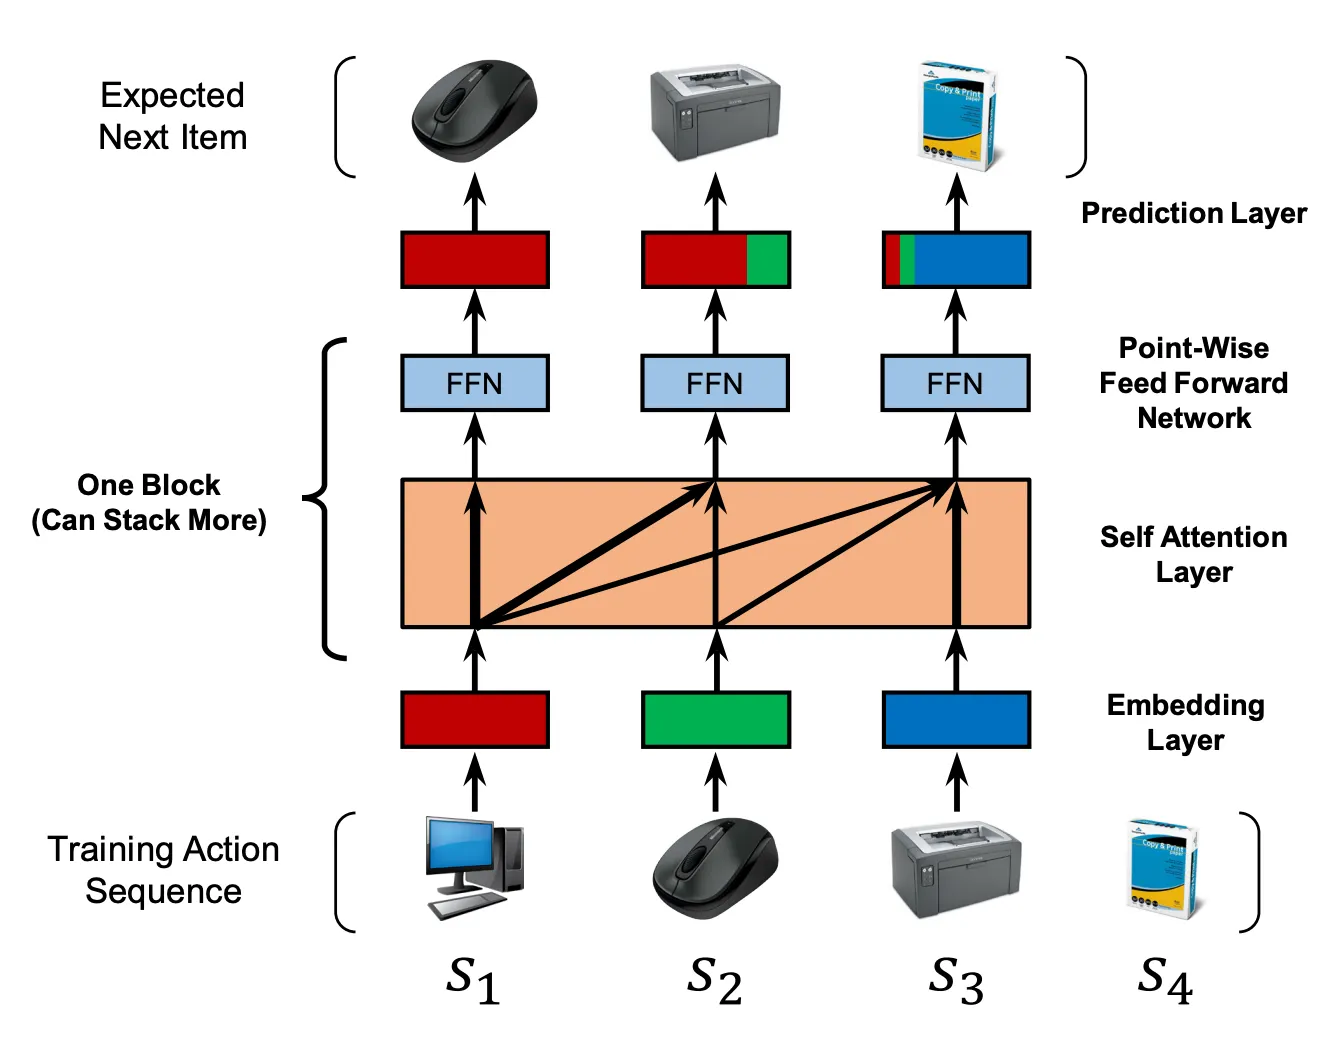

> 과거 정보만 활용하여 다음 행동 예측(디코더?)

*but...* 계산량 많고 단방향성

보완한 게
##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;">BERT4Rec</span>
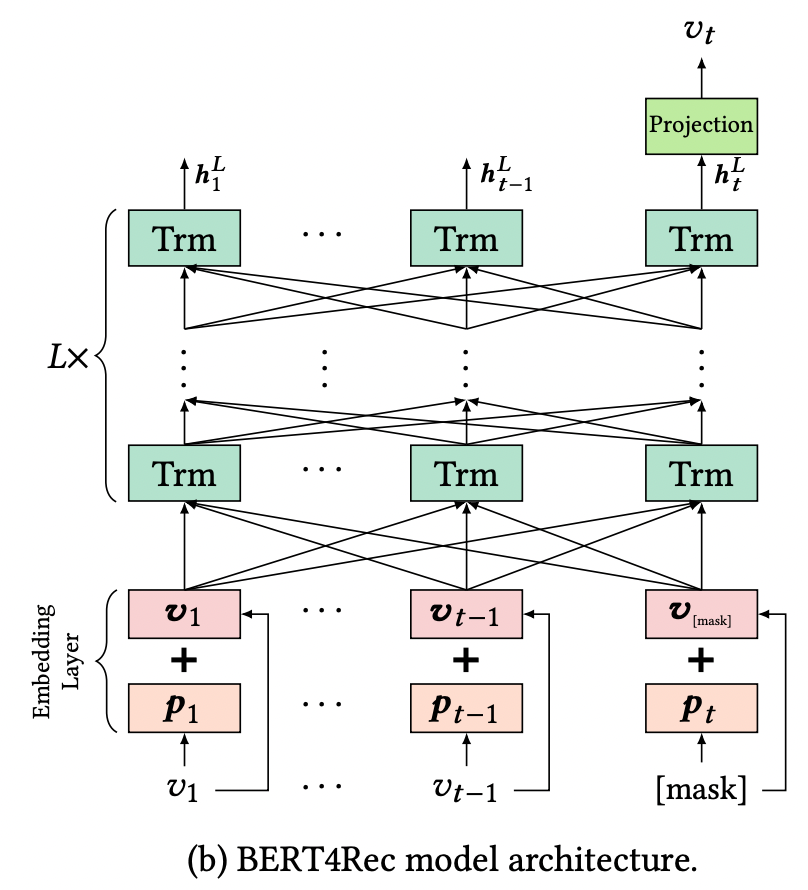

> 앙방향 어텐션으로 시퀀스 전체의 선호도 파악

- 최근 딥러닝 추천시스템 트렌드
    - 선형 모델 vs 딥러닝 모델
    - 서로 차이점
    - 왜 같이 사용되는가?

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 최신 트렌드</span>

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> 딥러닝</span>
> LLM이 추천을 점수 계산이 아닌 의미 기반으로 서술형 추천해 줌

*but* 개비싸...
- GPU 필요, 연산량 폭발
- 막대한 서버비
- 대규모 트래픽 서비스에는 지속 비용 감당 불가

-> 선형 모델 + 딥러닝 모델 병행 사용

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 선형 모델 </span>
> 빠르고 안정적, 해석 용이

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 딥러닝 모델 </span>
> 강력하지만 무겁고 복잡

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 사용 </span>
1. 후보군 생성
> 선형 모델로 수백만 개 아이템에 대해 사용자가 좋아할 만한 것 빠르게 골라냄

2. 순위 매기기
> 딥러닝으로 추려진 아이템에 대해 사용자가 가장 좋아할 순서대로 정교하게 순위 매김
